In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
import random


In [0]:
np.random.seed(0)

In [0]:
# import 60k mnist images into training set, and 10k in the test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# if this doesn't match, will throw an error
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_train.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'
assert(X_test.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'

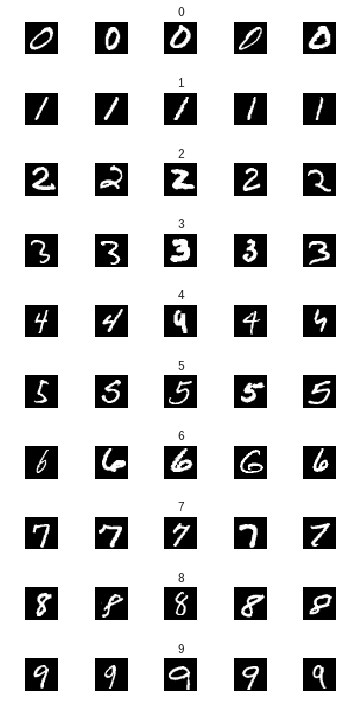

In [0]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout() # minimizes the overlap
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

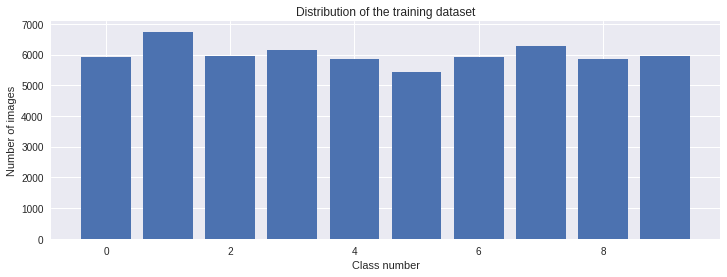

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

In [0]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.legend(['loss', 'val_loss'])
# plt.title('Loss')
# plt.xlabel('epoch')

In [0]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.legend(['acc', 'val_acc'])
# plt.title('Accuracy')
# plt.xlabel('epoch')

In [0]:
# score = model.evaluate(X_test, y_test, verbose=0)
# print(score)

In [0]:
# import requests
# from PIL import Image
# url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
# response = requests.get(url, stream=True)
# img = Image.open(response.raw)
# plt.imshow(img)

In [0]:
# import cv2

# img_array = np.asarray(img)
# resized = cv2.resize(img_array, (28, 28))
# gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# # subract all for 255
# image = cv2.bitwise_not(gray_scale)
# plt.imshow(image, cmap=plt.get_cmap('gray'))

In [0]:
# image = image / 255
# image = image.reshape(1, 784)

In [0]:
# prediction = model.predict_classes(image)
# print('predicted digit:', str(prediction))

In [0]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) # filters, filter size
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # let the features flatten so we can use as input into our fully connected layer (the standard NN part)
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
leNet_model = leNet_model()
print(leNet_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

In [0]:
history = leNet_model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.2381 - acc: 0.9245 - val_loss: 0.0675 - val_acc: 0.9802
Epoch 2/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0714 - acc: 0.9776 - val_loss: 0.0486 - val_acc: 0.9838
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0600 - acc: 0.9816 - val_loss: 0.0419 - val_acc: 0.9863
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0520 - acc: 0.9844 - val_loss: 0.0372 - val_acc: 0.9890
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0488 - acc: 0.9844 - val_loss: 0.0410 - val_acc: 0.9887
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0441 - acc: 0.9864 - val_loss: 0.0350 - val_acc: 0.9907
Epoch 7/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0419 - acc: 0.9869 - val_loss: 0.0416 - val_acc:

Text(0.5, 0, 'epoch')

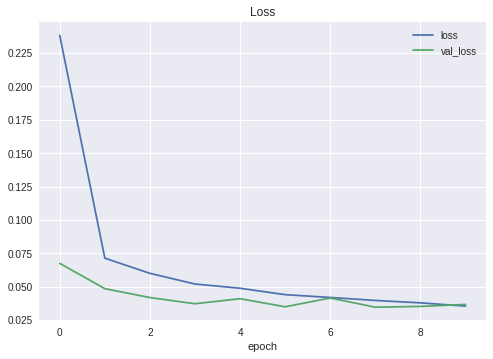

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

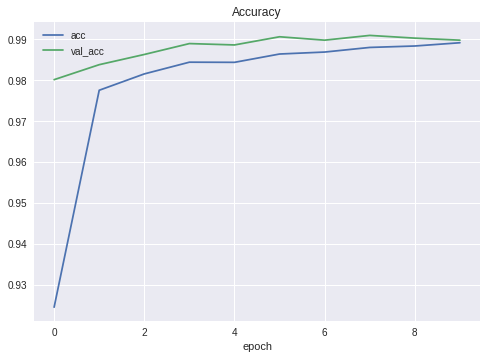

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

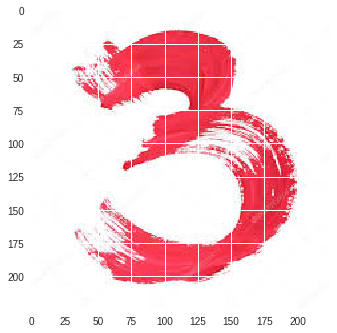

In [0]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

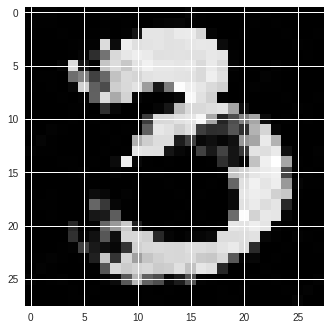

In [0]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# subract all for 255
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [0]:
image = image / 255
image = image.reshape(1, 28, 28, 1)

In [0]:
prediction = leNet_model.predict_classes(image)
print('predicted digit:', str(prediction))

predicted digit: [3]


In [0]:
score = leNet_model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.035152772429719516, 0.99]


In [0]:
layer1 = Model(inputs=leNet_model.layers[0].input, outputs=leNet_model.layers[0].output)
layer2 = Model(inputs=leNet_model.layers[0].input, outputs=leNet_model.layers[2].output)

visual_l1, visual_l2 = layer1.predict(image), layer2.predict(image)


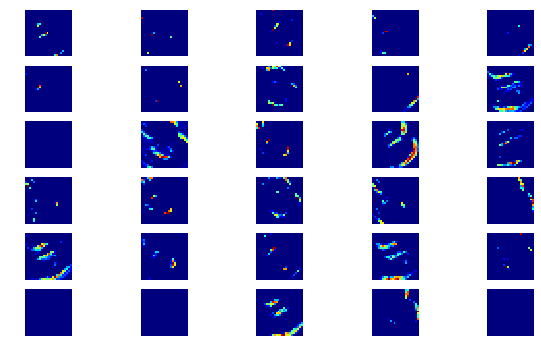

In [0]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_l1[0, :, :,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

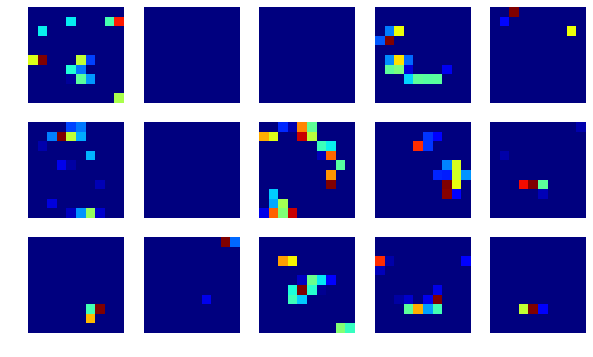

In [0]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_l2[0, :, :,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')